**package dependencies**
- pandas=1.4.3
- sklearn=1.1.1
- matplotlib=3.5.2
- jupyterlab=3.4.3
- python=3.9.13

In [1]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [2]:
df.rename(columns={'Spending Score (1-100)':'Spending','Annual Income (k$)':'Annual Income'},inplace=True)
df.head()

,CustomerID,Gender,Age,Annual Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
rel_cols = ['Age','Annual Income','Spending']
df_rel = df[rel_cols]

### Standardize the numeric values

In [4]:
from sklearn.preprocessing import StandardScaler
X = df_rel.values

In [5]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [6]:
from sklearn.cluster import KMeans
WSS = []
for i in range(1,12):
    m = KMeans(n_clusters=i)
    m = m.fit(x_scaled)
    WSS.append(m.inertia_)
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

square root of df.shape[0]

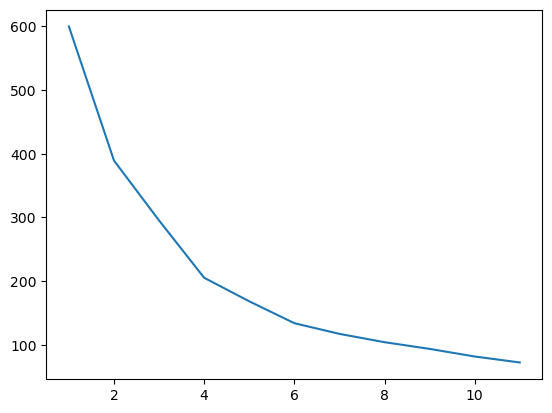

In [8]:
import matplotlib.pyplot as plt
x = list(range(1,12))
plt.plot(x,WSS,"-")

**Class Exercise**

Use the dataset `customers.csv` and do the following

1. Find WSS when number of clusters are 3 and 7
2. Also make an elbow curve and suggest how many cluster models you will experiment with

In [9]:
customers = pd.read_csv('customers.csv')
customers.head(2)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6


In [10]:
customers.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [11]:
customers = customers.dropna()

In [12]:
rel_cols = ['Age','Work_Experience','Family_Size']
X = customers[rel_cols].dropna().values

In [13]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [14]:
WSS = []
for i in range(1,12):
    m = KMeans(n_clusters=i)
    m = m.fit(x_scaled)
    WSS.append(m.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\clust

In [15]:
WSS[2]

3021.5954454797447

In [16]:
WSS[6]

1440.745715181333

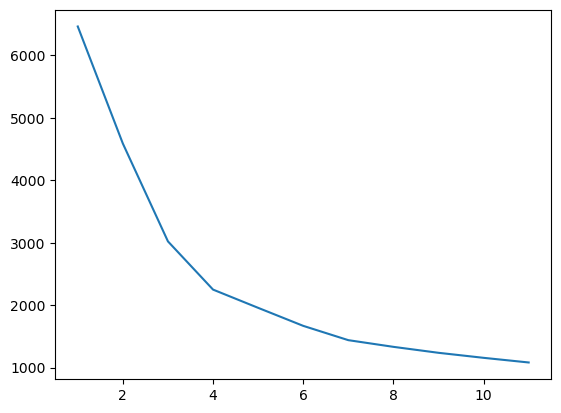

In [17]:
x = list(range(1,12))
plt.plot(x,WSS,"-")